In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('class1_df.csv')

df_train, df_val = train_test_split(df, test_size=.2)
df_train.shape, df_val.shape

((49262, 4), (12316, 4))

In [2]:
from skimage.transform import resize
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
          

ORIG_SHAPE = (424,424)
CROP_SIZE = (256,256)
IMG_SHAPE = (64,64)

def get_image(path, x1,y1, shape, crop_size):
    x = plt.imread(path)
    x = x[x1:x1+crop_size[0], y1:y1+crop_size[1]]
    x = resize(x, shape)
    x = x/255.
    return x
    
def get_all_images(dataframe, shape=IMG_SHAPE, crop_size=CROP_SIZE):
    x1 = (ORIG_SHAPE[0]-CROP_SIZE[0])//2
    y1 = (ORIG_SHAPE[1]-CROP_SIZE[1])//2
   
    sel = dataframe.values
    ids = sel[:,0].astype(int).astype(str)
    y_batch = sel[:,1:]
    x_batch = []
    for i in tqdm(ids):
        x = get_image('./galaxy-zoo-data/images_training_rev1/'+i+'.jpg', x1,y1, shape=shape, crop_size=crop_size)
        x_batch.append(x)
    x_batch = np.array(x_batch)
    return x_batch, y_batch
        
X_train, y_train = get_all_images(df_train)
X_val, y_val = get_all_images(df_val)

100%|██████████| 12316/12316 [01:54<00:00, 107.59it/s]


In [4]:
#for i in range(3):
    #x = 110
    #y = 110
    #h = 25
    #w = 25
    #crop_img = original[x-h:x+h,y-w:y+w]
    #cv2.imshow("cropped", crop_img)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

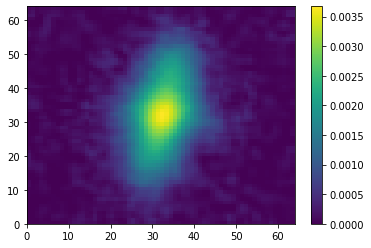

In [5]:
plt.pcolormesh(X_train[49261,:,:,0])
plt.colorbar()

In [6]:
X_train[1, :, :, 0]

array([[6.15148020e-05, 3.07574010e-05, 5.38254517e-05, ...,
        1.92233756e-05, 0.00000000e+00, 0.00000000e+00],
       [4.61361015e-05, 2.69127259e-05, 7.68935025e-06, ...,
        1.53787005e-05, 6.92041522e-05, 3.07574010e-05],
       [1.92233756e-05, 2.69127259e-05, 1.53787005e-05, ...,
        2.30680507e-05, 8.84275279e-05, 5.38254517e-05],
       ...,
       [1.53787005e-05, 6.15148020e-05, 3.07574010e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.92233756e-05, 1.15340254e-05, 1.53787005e-05, ...,
        0.00000000e+00, 0.00000000e+00, 1.15340254e-05],
       [2.30680507e-05, 1.53787005e-05, 7.68935025e-06, ...,
        1.53787005e-05, 0.00000000e+00, 0.00000000e+00]])

In [7]:
X_train.shape, y_train.shape

((49262, 64, 64, 3), (49262, 3))

In [8]:
y_val.shape

(12316, 3)

Tutorial CNN : https://victorzhou.com/blog/keras-cnn-tutorial/

In [9]:
# ! pip install keras tensorflow numpy mnist

In [10]:
#import numpy as np
#import mnist
#import keras

 #The first time you run this might be a bit slow, since the mnist package has to download and cache the data.
#train_images = mnist.train_images()
#train_labels = mnist.train_labels()
#test_images = mnist.test_images()
#test_labels = mnist.test_labels()

#print(train_images.shape) # (60000, 28, 28)
#print(train_labels.shape) # (60000,)

In [11]:
# Normalize the images.
train_images = (X_train / 255) - 0.5
val_images = (X_val / 255) - 0.5

print(train_images.shape) 
print(val_images.shape)  

(49262, 64, 64, 3)
(12316, 64, 64, 3)


In [12]:
# ignore Warning
import warnings
warnings.filterwarnings("ignore")

from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, GlobalMaxPooling2D, Conv2D, MaxPooling2D
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, GlobalMaxPooling2D, Conv2D, MaxPooling2D
from keras.applications import MobileNet
from keras.callbacks import EarlyStopping

callbacks = [EarlyStopping(monitor='val_accuracy', patience=10)]

seed = 7
np.random.seed(seed)
tf.set_random_seed(seed)
#tf.random.set_seed(seed)

pretrained_model = MobileNet(include_top=False, input_shape=(64, 64, 3), weights='imagenet')

model = Sequential()
model.add(pretrained_model)
#model.add(Conv2D(filters=8, kernel_size=(6,6),input_shape=(64,64,3),activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=8, kernel_size=(6,6),activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(4,4)))
#model.add(Dense(128, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

  #Conv2D(num_filters, filter_size, input_shape=(64, 64, 3)),
  #MaxPooling2D(pool_size=pool_size),
  #Flatten(),
  #Dense(3, activation='sigmoid'),
#])



Using TensorFlow backend.


C:\Users\utilisateur\Anaconda3\envs\computer_vision\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [13]:
import keras
# Set Optimizer
#opt = adam(lr=0.001)
model.compile(
  loss='categorical_crossentropy',
  optimizer=keras.optimizers.Adamax(),
  metrics=['accuracy'],
)

In [14]:
# ignore Warning
import warnings
warnings.filterwarnings("ignore")

history = model.fit(
  train_images,
  y_train,
  epochs=100,
  validation_data=(val_images, y_val),
  batch_size=X_train.shape[1], 
  callbacks=callbacks
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 49262 samples, validate on 12316 samples
Epoch 1/100
49262/49262 [==============================] - 1390s 28ms/step - loss: 1.0818 - acc: 0.7249 - val_loss: 2.2966 - val_acc: 0.5731
Epoch 2/100
49262/49262 [==============================] - 1476s 30ms/step - loss: 1.0127 - acc: 0.7560 - val_loss: 1.7198 - val_acc: 0.4262
Epoch 3/100
49262/49262 [==============================] - 1464s 30ms/step - loss: 1.0022 - acc: 0.7704 - val_loss: 0.8983 - val_acc: 0.5723
Epoch 4/100
49262/49262 [==============================] - 1463s 30ms/step - loss: 0.9960 - acc: 0.7783 - val_loss: 1.3137 - val_acc: 0.4262
Epoch 5/100
49262/49262 [==============================] - 1462s 30ms/step - loss: 0.9847 - acc: 0.7911 - val_loss: 0.8746 - val_acc: 0.5731
Epoch 6/100
49262/49262 [==============================] - 1461s 30ms/step - loss: 0.9861 - acc: 0.7874 - val_loss: 2.0753 - val_acc: 0.4262
Epoch 7/

KeyboardInterrupt: 

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 59, 59, 8)         872       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        4624      
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
dense_1 (Dense)              (None, 6, 6, 128)         2176      
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
__________

In [16]:
# Predict.
predictions = model.predict(val_images)
print("predictions: " + str(predictions[:1]))

# Print our model's predictions.
#print(np.argmax(predictions, axis=1)) 

# Check our predictions against the ground truths.
print(y_val[:1]) 

predictions: [[0.44077274 0.5347215  0.02450575]]
[[0.510951 0.442604 0.046445]]


In [17]:
score = model.evaluate(X_val, y_val, verbose=0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.7867188921955043
Val accuracy: 0.5670672296200064


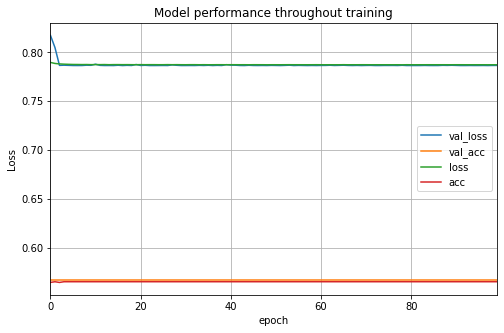

In [18]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()